### Script Contents:

#### 1. Import libraries and data
#### 2. Data preparation
#### 3. The elbow technique
#### 4. K-means clustering
    3.1 Visualizations
    3.2 Descriptive statistics and insights
#### 5. Export data

### 1. Import libraries and data


In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

In [23]:
path =r'C:\Users\25670\Desktop\CiteBikes Analysis'

In [24]:
path

'C:\\Users\\25670\\Desktop\\CiteBikes Analysis'

In [25]:
#Importing cleaned data

data_cleaned=pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'citibike_clean.csv'))

### 2. Data prepreparation

In [3]:
data_cleaned.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,...,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender_label,start_year,start_month,end_hour,Age
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,...,40.742388,-73.997262,993,Subscriber,1968.0,female,2013,9,18,45.0
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,...,40.728419,-73.987140,581,Subscriber,1983.0,male,2013,9,18,30.0
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,...,40.768254,-73.988639,361,Subscriber,1989.0,male,2013,9,19,24.0
3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,...,40.756014,-73.967416,561,Subscriber,1988.0,female,2013,9,12,25.0
4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,...,40.743943,-73.979661,2296,Non-Subscriber,NaN,unknown,2013,9,18,NaN


In [4]:
data_cleaned.dtypes

trip_id                     object
bike_id                      int64
weekday                     object
start_hour                   int64
start_time                  object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_time                    object
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
trip_duration                int64
subscriber                  object
birth_year                 float64
gender_label                object
start_year                   int64
start_month                  int64
end_hour                     int64
Age                        float64
dtype: object

In [5]:
# Create a subset containing only numerical variables
df_numerical = data_cleaned.drop(columns=['trip_id', 'weekday', 'start_time', 'end_time', 'start_station_name', 'end_station_name', 'subscriber', 'gender_label', 'start_month', 'end_station_latitude', 'end_station_longitude', 'subscriber', 'start_station_latitude', 'start_station_longitude'])

In [6]:
df_numerical.head()

,bike_id,start_hour,start_station_id,end_station_id,trip_duration,birth_year,start_year,end_hour,Age
0,16013,18,523,334,993,1968.0,2013,18,45.0
1,15230,18,257,236,581,1983.0,2013,18,30.0
2,17942,19,479,513,361,1989.0,2013,19,24.0
3,19683,11,527,441,561,1988.0,2013,12,25.0
4,18024,18,521,476,2296,NaN,2013,18,NaN


In [7]:
### Changing 'NAN' values to 'column means' for analysis because it cuts a cross two variables that are key for analysis

df_numerical_new = df_numerical.fillna(df_numerical.mean())
df_numerical_new.head()

,bike_id,start_hour,start_station_id,end_station_id,trip_duration,birth_year,start_year,end_hour,Age
0,16013,18,523,334,993,1968.000000,2013,18,45.000000
1,15230,18,257,236,581,1983.000000,2013,18,30.000000
2,17942,19,479,513,361,1989.000000,2013,19,24.000000
3,19683,11,527,441,561,1988.000000,2013,12,25.000000
4,18024,18,521,476,2296,1975.627786,2013,18,37.372214


In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numerical_new)

### 3. Elbow technique

In [9]:
# Define the number of potential clusters in the data
num_cl = range(1,10)

In [10]:
# Define a list of inertia values for each k-means clustering model
inertia = []

for i in num_cl:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_numerical_new)
    inertia.append(kmeans.inertia_)

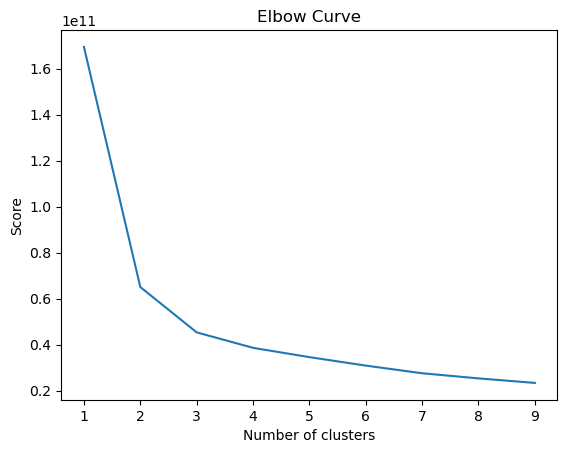

In [11]:
# Plot the scores to visualize the 'elbow'
pl.plot(num_cl,inertia)
pl.title('Elbow Curve')
pl.xlabel('Number of clusters')
pl.ylabel('Score')
pl.show()

The curve begins to flatten out around 4 clusters. After 4, the reduction in score becomes less significant indicating that more clusters would greatly improve the model's fit. The ideal number of clusters for this dataset is 4. 

### 4. K-means clustering

In [12]:
# Create the kmeans object
Kmeans = KMeans(n_clusters=4)

In [13]:
# Fit the k-means object to the dataframe
Kmeans.fit(df_numerical_new)

KMeans(n_clusters=4)

In [14]:
# Create new column in dataframe to show the clusters
df_numerical_new['clusters'] = Kmeans.fit_predict(df_numerical_new)
df_numerical_new.head()

,bike_id,start_hour,start_station_id,end_station_id,trip_duration,birth_year,start_year,end_hour,Age,clusters
0,16013,18,523,334,993,1968.000000,2013,18,45.000000,1
1,15230,18,257,236,581,1983.000000,2013,18,30.000000,1
2,17942,19,479,513,361,1989.000000,2013,19,24.000000,3
3,19683,11,527,441,561,1988.000000,2013,12,25.000000,0
4,18024,18,521,476,2296,1975.627786,2013,18,37.372214,3


In [15]:
df_numerical_new['clusters'].value_counts()

clusters
1    13504
2    13441
3    12682
0    10373
Name: count, dtype: int64

#### 3.1 Visualizations

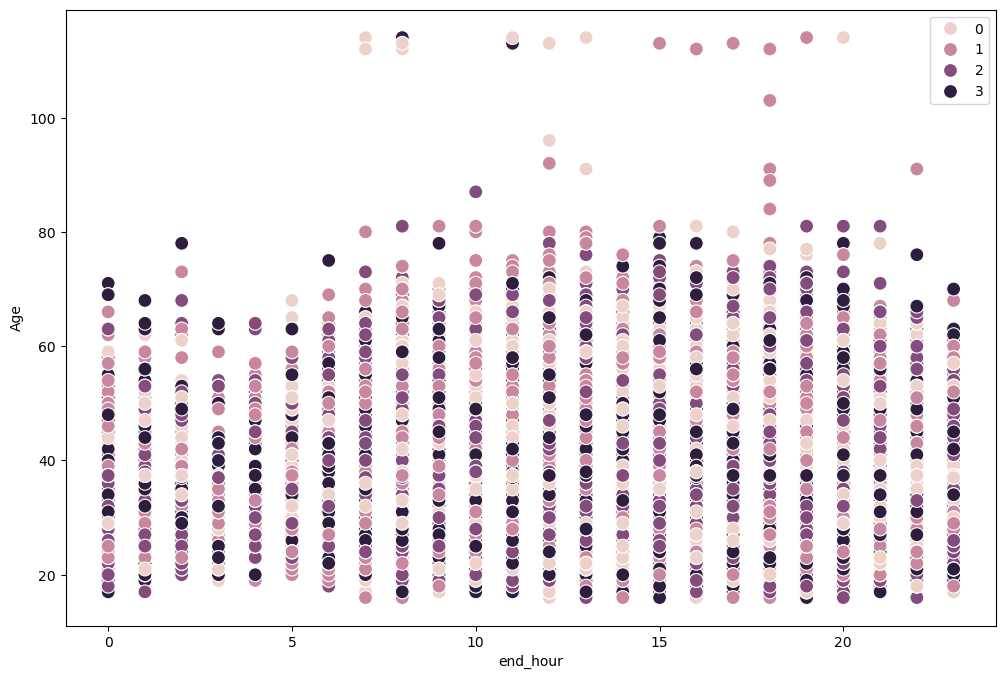

In [16]:
# Visualize the clusters in a scatterplot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical_new['end_hour'], y=df_numerical_new['Age'], hue = Kmeans.labels_, s=100)

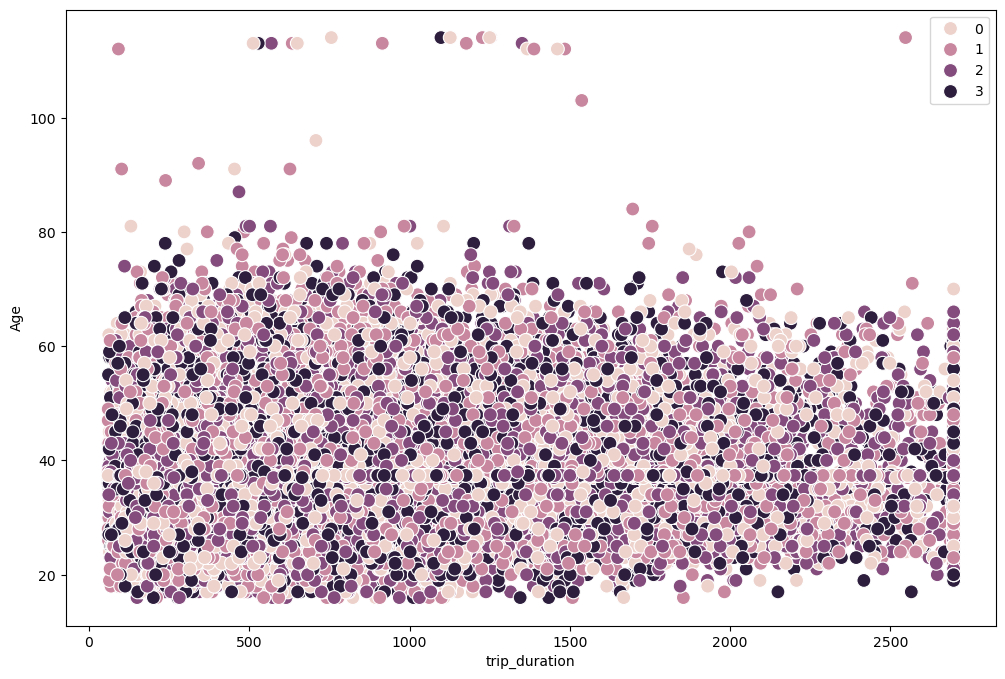

In [17]:
# Visualize the clusters in a scatterplot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical_new['trip_duration'], y=df_numerical_new['Age'], hue = Kmeans.labels_, s=100)

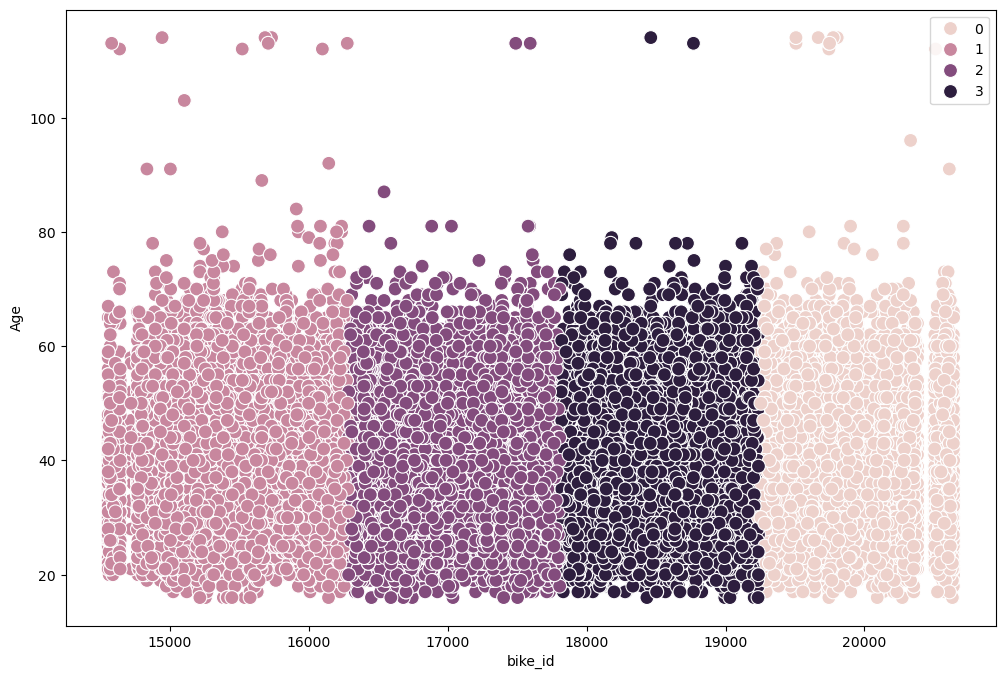

In [18]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['bike_id'], y=df_numerical['Age'], hue = Kmeans.labels_, s=100)

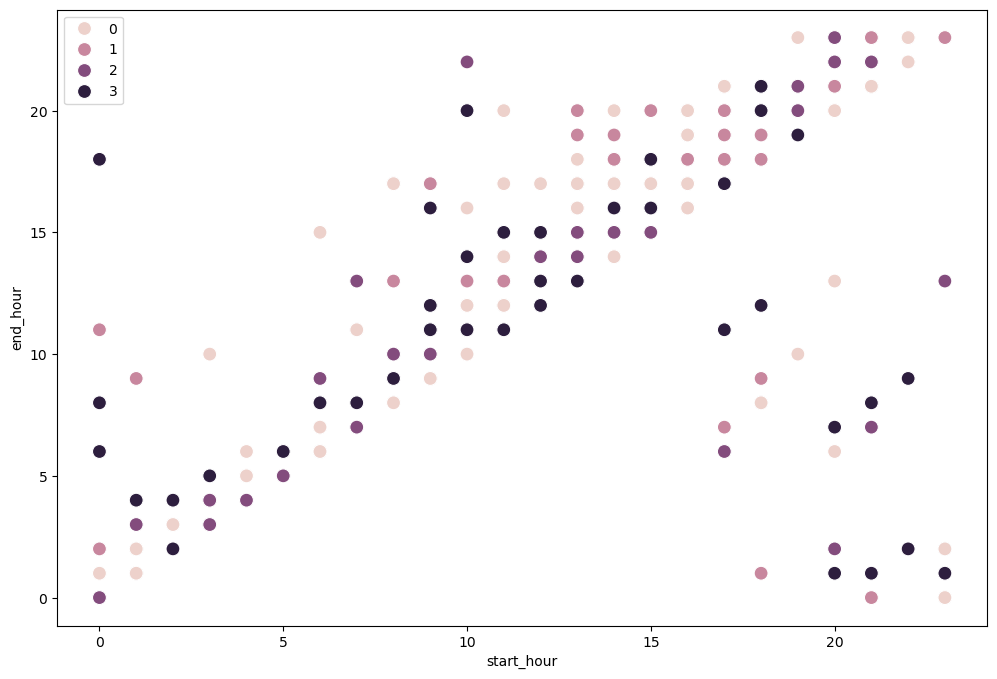

In [19]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['start_hour'], y=df_numerical['end_hour'], hue = Kmeans.labels_, s=100)

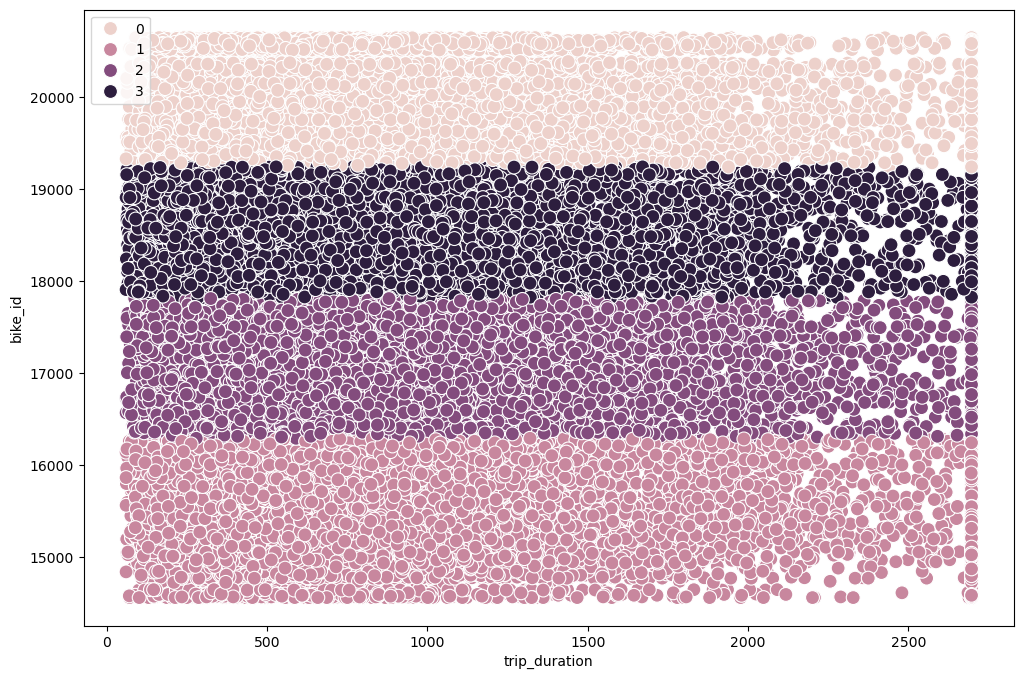

In [20]:
# Visualize the clusters in a scatterplot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['trip_duration'], y=df_numerical['bike_id'], hue = Kmeans.labels_, s=100)

#### 3.2 Descriptive statistics and insights

In [21]:
# Calculate descriptive statistics for each cluster

df_numerical_new.loc[df_numerical_new['clusters'] == 3, 'clusters'] = 'dark purple'
df_numerical_new.loc[df_numerical_new['clusters'] == 2, 'clusters'] = 'purple'
df_numerical_new.loc[df_numerical_new['clusters'] == 1, 'clusters'] = 'light purple'
df_numerical_new.loc[df_numerical_new['clusters'] == 0, 'clusters'] = 'light pink'

df_numerical_new.groupby('clusters').agg({
    'bike_id': ['mean', 'median'], 
    'start_hour': ['mean', 'median'], 
    'start_station_id': ['mean', 'median'], 
    'end_station_id': ['mean', 'median'],
    'trip_duration': ['mean', 'median'],
    'birth_year': ['mean', 'median'],
    'start_year': ['mean', 'median'],
    'end_hour': ['mean', 'median'],
    'Age': ['mean', 'median']
})

C:\Users\25670\AppData\Local\Temp\ipykernel_22868\2960207101.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'dark purple' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_numerical_new.loc[df_numerical_new['clusters'] == 3, 'clusters'] = 'dark purple'


bike_id          start_hour        start_station_id         \
                      mean   median       mean median             mean median   
clusters                                                                        
dark purple   18563.748226  18616.0  14.152421   15.0       439.734111  403.0   
light pink    19923.797359  19891.0  14.118963   15.0       447.101417  401.0   
light purple  15506.037026  15469.0  14.140181   15.0       439.704458  402.0   
purple        17057.878060  17038.0  14.163827   15.0       447.423183  404.0   

             end_station_id        trip_duration          birth_year  \
                       mean median          mean median         mean   
clusters                                                               
dark purple      439.667087  402.0    835.613310  671.0  1975.579325   
light pink       448.342813  401.0    847.594331  674.0  1975.731110   
light purple     442.244446  402.0    842.968972  677.0  1975.488713   
purple           441.068224  402.0    831.511643  666.0  1975.733497   

                          start_year           end_hour               Age  \
                   median       mean  median       mean median       mean   
clusters                                                                    
dark purple   1975.627786     2013.0  2013.0  14.315013   15.0  37.420675   
light pink    1976.000000     2013.0  2013.0  14.265015   15.0  37.268890   
light purple  1975.627786     2013.0  2013.0  14.318720   15.0  37.511287   
purple        1975.627786     2013.0  2013.0  14.323116   15.0  37.266503   

                         
                 median  
clusters                 
dark purple   37.372214  
light pink    37.000000  
light purple  37.372214  
purple        37.372214

**Purple:**
- bike_id: With an average of 17057 which could mean old bikes with good performance
- start_hour: With most trips starting at 2 pm - 3 pm (14-15)
- start_station_id: With the most used start_station_id being 447 
- end_station_id: With the most used end_station_id being 441
- trip_duration: With an average trip duration of 831 seconds on trips
- birth_year: 1975 giving us about 37 years of age
- start_year: Average of 2013, this being the only year in question
- end_hour: Most trips ending between 2 pm - 3 pm (14- 15)
- Age: Average of 37 years for bike users

    **Insight:** This cluster likely presents old but good performance bikes, situated in popular start stations, used for shorter trips and by customers who are 37 years to desired end stations.

**Light Purple:**
- bike_id: With an average of 15506 which could mean old bikes with good performance
- start_hour: With most trips starting at 2 pm - 3 pm (14-15)
- start_station_id: With the most used start_station_id being 439 
- end_station_id: With the most used end_station_id being 442
- trip_duration: With an average trip duration of 402 seconds on trips
- birth_year: 1975 giving us about 37 years of age
- start_year: Average of 2013, this being the only year in question
- end_hour: Most trips ending between 2 pm - 3 pm (14- 15)
- Age: Average of 37 years for bike users

    **Insight:** This cluster likely presents old but good performance bikes, situated in popular start stations, used for shorter trips and by customers who are 37 years to desired end stations.

**Light Pink:**
- bike_id: With an average of 19923 which could mean newly acquired and good-performance bikes
- start_hour: With most trips starting at 2 pm - 3 pm (14-15)
- start_station_id: With the most used start_station_id being 447 
- end_station_id: With the most used end_station_id being 448
- trip_duration: With an average trip duration of 847 seconds on trips
- birth_year: 1976 giving a mean of 37 years of age
- start_year: Average of 2013, this being the only year in question
- end_hour: Most trips ending between 2 pm - 3 pm (14- 15)
- Age: Average of 37 years for bike users

    **Insight:** This cluster likely presents newly acquired bikes and good performance, situated in popular start stations, used for medium-timed trips, and by customers who are 37 years to desired end stations.

**Dark Purple:**
- bike_id: With an average of 18579 which could mean bikes in good condition
- start_hour: With most trips starting at 2 pm - 3 pm (14-15)
- start_station_id: With the most used start_station_id being 439 
- end_station_id: With the most used end_station_id being 439
- trip_duration: With an average trip duration of 835 seconds on trips
- birth_year: 1975 giving a mean of 37 years of age 
- start_year: Average of 2013, this being the only year in question
- end_hour: Most trips ending between 2 pm - 3 pm (14- 15)
- Age: Average of 37 years this was the column mean used to replace "Nan" values in the dataframe 

    **Insight:** This cluster likely presents good-conditioned bikes in popular start stations, used for longer trips and by customers who are 37 years to desired end stations.

**Given these results, I am of the understanding that all the variables have a similar influence on each other especialy on "Age" and there is need to further disect the data to clearly understand the different influence of each numerical variable.**

### 5. Export data

In [28]:
## Exporting the final cleaned data

data_cleaned.to_csv(os.path.join(path, '02. Data', 'Prepared Data', 'citibike_clean_updated.csv'))